<a href="https://colab.research.google.com/github/caetanofreitas/fiap-ia-ml-trab1/blob/main/TrabalhoFIAP1POSIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e análise inicial dos dados

In [2]:
import pandas as pd

dataset = pd.read_csv("./insurance_dataset.csv", sep=",")

In [3]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


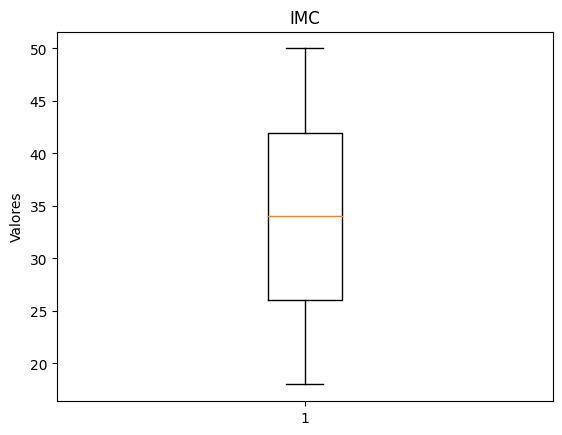

Máximo de imc: 50.0 | Mínimo de imc: 18.0


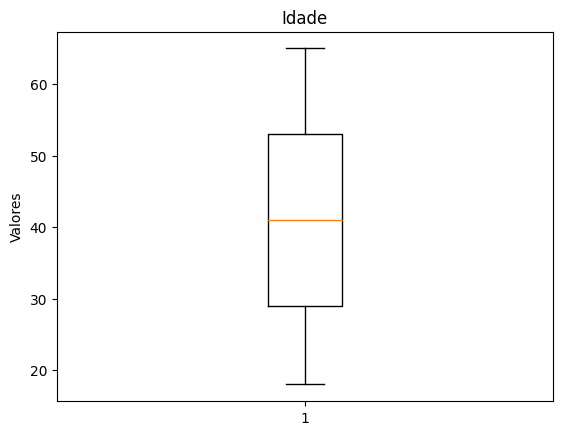

Máximo de idade: 65 | Mínimo de idade: 18


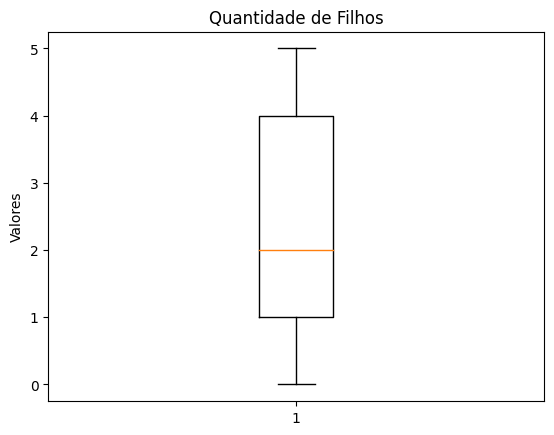

Máximo de filhos: 5 | Mínimo de filhos: 0


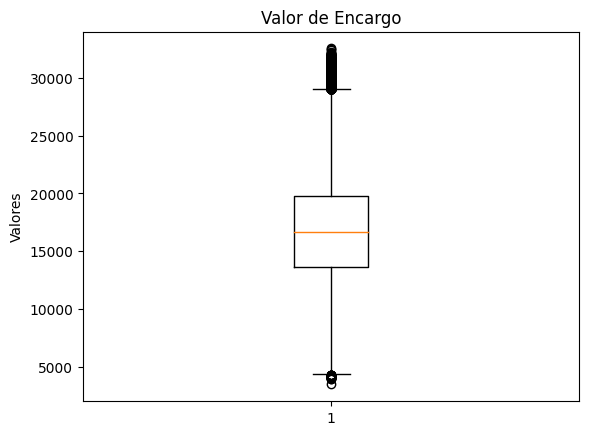

Máximo de Encargos: 32561.56037356053 | Mínimo de Encargos: 3445.0116431134834


In [4]:
import matplotlib.pyplot as plt

# Gráfico de boxplot IMC
plt.boxplot(dataset['bmi'])
plt.title('IMC')
plt.ylabel('Valores')
plt.show()
print(f"Máximo de imc: {dataset['bmi'].max()} | Mínimo de imc: {dataset['bmi'].min()}")

# Gráfico de boxplot Idade
plt.boxplot(dataset['age'])
plt.title('Idade')
plt.ylabel('Valores')
plt.show()
print(f"Máximo de idade: {dataset['age'].max()} | Mínimo de idade: {dataset['age'].min()}")

# Gráfico de boxplot Filhos
plt.boxplot(dataset['children'])
plt.title('Quantidade de Filhos')
plt.ylabel('Valores')
plt.show()
print(f"Máximo de filhos: {dataset['children'].max()} | Mínimo de filhos: {dataset['children'].min()}")

# Gráfico de boxplot Encargos
plt.boxplot(dataset['charges'])
plt.title('Valor de Encargo')
plt.ylabel('Valores')
plt.show()
print(f"Máximo de Encargos: {dataset['charges'].max()} | Mínimo de Encargos: {dataset['charges'].min()}")

# Definições das variáveis e tratativa dos dados

In [5]:
from sklearn.preprocessing import LabelEncoder

# Normalizando Informações de string para numéricos
lbl_encoder = LabelEncoder()
dataset['gender'] = lbl_encoder.fit_transform(dataset['gender'])
dataset['smoker'] = lbl_encoder.fit_transform(dataset['smoker'])
dataset['region'] = lbl_encoder.fit_transform(dataset['region'])
dataset.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,1,21.45,5,1,2,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,0,25.38,2,1,1,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,1,44.88,2,1,3,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,1,19.89,0,0,1,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,1,38.21,3,1,1,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


# Preparando Massa de dados para treino e teste

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = dataset.drop(columns=['charges', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level'])
y = dataset['charges']
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X.head()
X_train_scaled

array([[0.38297872, 1.        , 0.5653125 , 0.2       , 0.        ,
        0.66666667],
       [0.19148936, 1.        , 0.3290625 , 0.6       , 1.        ,
        0.66666667],
       [0.91489362, 1.        , 0.3259375 , 0.4       , 0.        ,
        0.        ],
       ...,
       [0.76595745, 0.        , 0.819375  , 0.8       , 1.        ,
        0.33333333],
       [0.82978723, 1.        , 0.41      , 0.2       , 0.        ,
        0.33333333],
       [0.53191489, 1.        , 0.51      , 0.6       , 1.        ,
        0.33333333]])

# Executando o modelo

In [9]:
import statsmodels.api as sm

model = sm.OLS(X_train_scaled, y_train).fit()

y_pred = model.predict(X_test_scaled)

print(y_pred)

ValueError: shapes (200000,6) and (1,6) not aligned: 6 (dim 1) != 1 (dim 0)